In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from typing import List, Tuple

In [3]:
def plot_data_piechart(data: pd.DataFrame, col_name: str)->None:
    """plot a pie chart of the given column"""
    #data.groupby([col_name]).sum().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90)
    data[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(12,12), title='Manufacturer', ylabel='Manufacturer')

def plot_data_hist(data: pd.DataFrame, col_name: str, bins_count: int = 1000)->None:
    """plot a histogram of the given column"""
    data.hist(column=col_name, bins=bins_count)

def plot_data_stacked_hist(list: List[List[int]], labels: List[str], colors: str, col_1: str, col_2: str, bins_count: int = 60)->None:
    """plot a stacked histogram of the given column"""
    plt.hist(list, bins=bins_count, stacked=True, density=True, color=colors, label=labels, histtype='barstacked')
    # Plot formatting
    plt.legend()
    plt.xlabel(col_2)
    plt.ylabel(col_1)
    plt.title(f'Side-by-Side Histogram between {col_1} and {col_2}')

def plot_data_boxplot(data: pd.DataFrame, col_name: str)->None:
    """plot a boxplot of the given column"""
    data.boxplot(column=col_name)

def plot_data_relationship(data: pd.DataFrame, col_name_1: str, col_name_2: str)->None:
    """plot a scatter plot of the given columns"""
    data.plot.scatter(x=col_name_1, y=col_name_2)

def print_meta_data(nums: List[float])->None:
    print("+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++")
    # print the min and max values
    print(f"Min: {np.min(nums)}")
    print(f"Max: {np.max(nums)}")
    # print the mean and median values
    print(f"Mean: {np.mean(nums)}")
    print(f"Median: {np.median(nums)}")
    # print the standard deviation
    print(f"Standard Deviation: {np.std(nums)}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

def get_outliers(nums: List[float], use_iqd: bool = False)-> Tuple[List[int], List[float]]:
    """
    Returns a list of outliers and their indexes in the given list of numbers
    """
    outlier_indecies: List[int] = []
    outlier_values: List[float] = []
    if use_iqd:
        # compute the interquartile range
        q_1: float = float(np.percentile(nums, 25))
        q_3: float = float(np.percentile(nums, 75))
        iqr: float = q_3 - q_1
        # compute the lower and upper bounds
        lower_bound: float = q_1 - (1.5 * iqr)
        upper_bound: float = q_3 + (1.5 * iqr)
        # find the outliers
        for index, num in enumerate(nums):
            if num < lower_bound or num > upper_bound:
                outlier_indecies.append(index)
                outlier_values.append(num)
    else:
        # cast to float beacuse the return type is floating[any]
        mean: float = float(np.mean(nums))
        std: float = float(np.std(nums))
        for index, num in enumerate(nums):
            z_score: float = (num - mean) / std
            if np.abs(z_score) > 3:
                outlier_indecies.append(index)
                outlier_values.append(num)
    return outlier_indecies, outlier_values

def substitute_outliers_with_mean(nums: List[float], outlier_indexes:List[int])->List[float]:
    """return a list of numbers with outliers replaced by the most frequent value"""
    mean: float = float(np.mean(nums))
    for index in outlier_indexes:
        nums[index] = mean
    return nums

def numbers_datacleaning_pipe(nums: List[float])->List[float]:
    """returns a list of numbers with outliers replaced by the mean"""
    outlier_indexes, outlier_values = get_outliers(nums)
    # if there are no outliers, return the original list
    if len(outlier_indexes) == 0:
        return nums
    else:
        return substitute_outliers_with_mean(nums, outlier_indexes)

def clean_data(data: pd.DataFrame)->pd.DataFrame:
    data['Levy'] = data['Levy'].str.replace('-', '')
    data['turbo'] = data['Engine volume'].str.contains('Turbo', regex=False)
    data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
    data['Engine volume'] = data['Engine volume'].str.replace(' ', '')
    
    
    data.drop('Doors', axis=1, inplace=True)
    data.drop('Color', axis=1, inplace=True)
    data.drop('Wheel', axis=1, inplace=True)
    
    return data

def visualize_data(data: pd.DataFrame)->None:
    """visualize the data"""
    data['turbo'].value_counts().plot.bar()
    plt.show()

    data['Category'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Manufacturer'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Engine volume'].value_counts().plot.bar()
    plt.show()

    data['Drive wheels'].value_counts().plot.bar()
    plt.show()

    data['Airbags'].value_counts().plot.bar()
    plt.show()


In [35]:
# load the dataset into pandas dataframe
df:pd.DataFrame = pd.read_csv('train.csv')
df = clean_data(df)
print(df.head())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467              HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels  Airbags  turbo  
0     Automatic          4x4       12  False  
1     Tiptronic          4x4        8  False  
2      Vari

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1
Max: 26307500
Mean: 18555.92722357956
Median: 13172.0
Standard Deviation: 190576.31611155753
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1.0
Max: 308906.0
Mean: 17113.29073045021
Median: 13172.0
Standard Deviation: 18276.756081076466
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 178.5
Max: 308906.0
Mean: 18857.837369031386
Median: 14269.0
Standard Deviation: 17407.67227533668
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


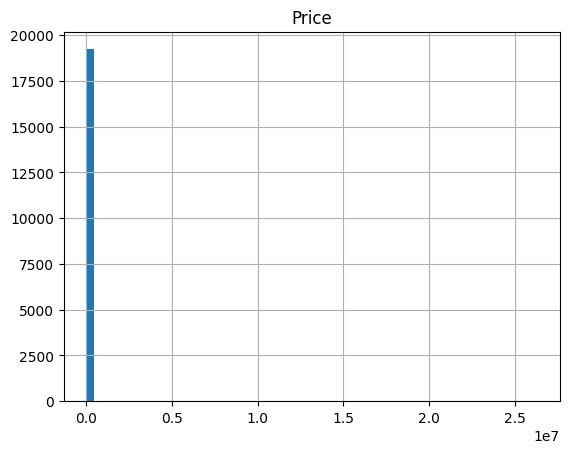

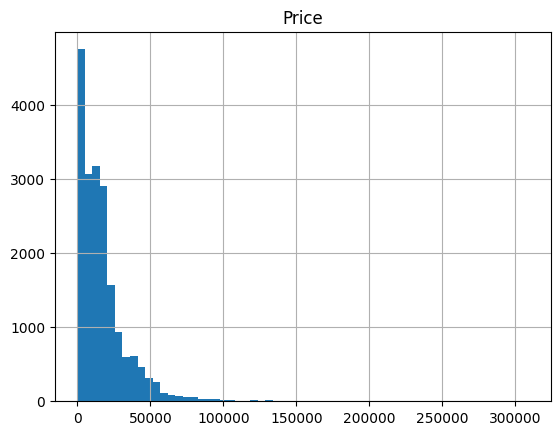

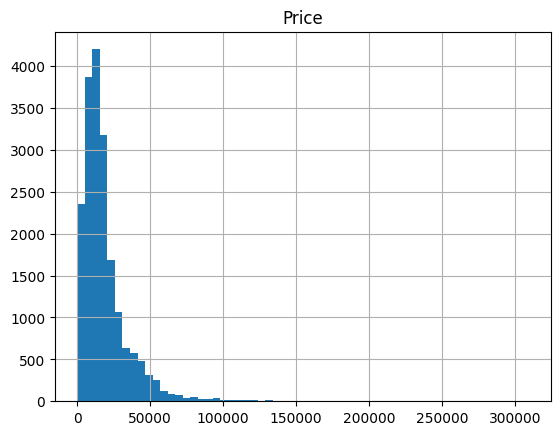

In [5]:
prices_before_cleaning: List[float] = df['Price'].values.tolist()
# print the meta data of the target variable
print_meta_data(prices_before_cleaning)
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# clean prices
prices_after_cleaning: List[float] = numbers_datacleaning_pipe(prices_before_cleaning)
# print the meta data of the target variable
print_meta_data(prices_after_cleaning)
df['Price'] = prices_after_cleaning
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# loop over all prices
prices: List[float] = df["Price"].values.tolist()
for index, price in enumerate(prices):
    # if the price is less than 2000 replace it with the average prices of the same car model
    if price < 1000:
        # get the car model
        car_model: str = df["Model"][index]
        # get the average price of the car model
        average_price: float = df[df["Model"] == car_model]["Price"].mean()
        if average_price == price:
            prices[index] = 1000
        else:
            # replace the price with the average price
            prices[index] = average_price
df["Price"] = prices
# plot the distribution of the target variable
print_meta_data(df["Price"].values.tolist())
plot_data_hist(df, "Price", 60)

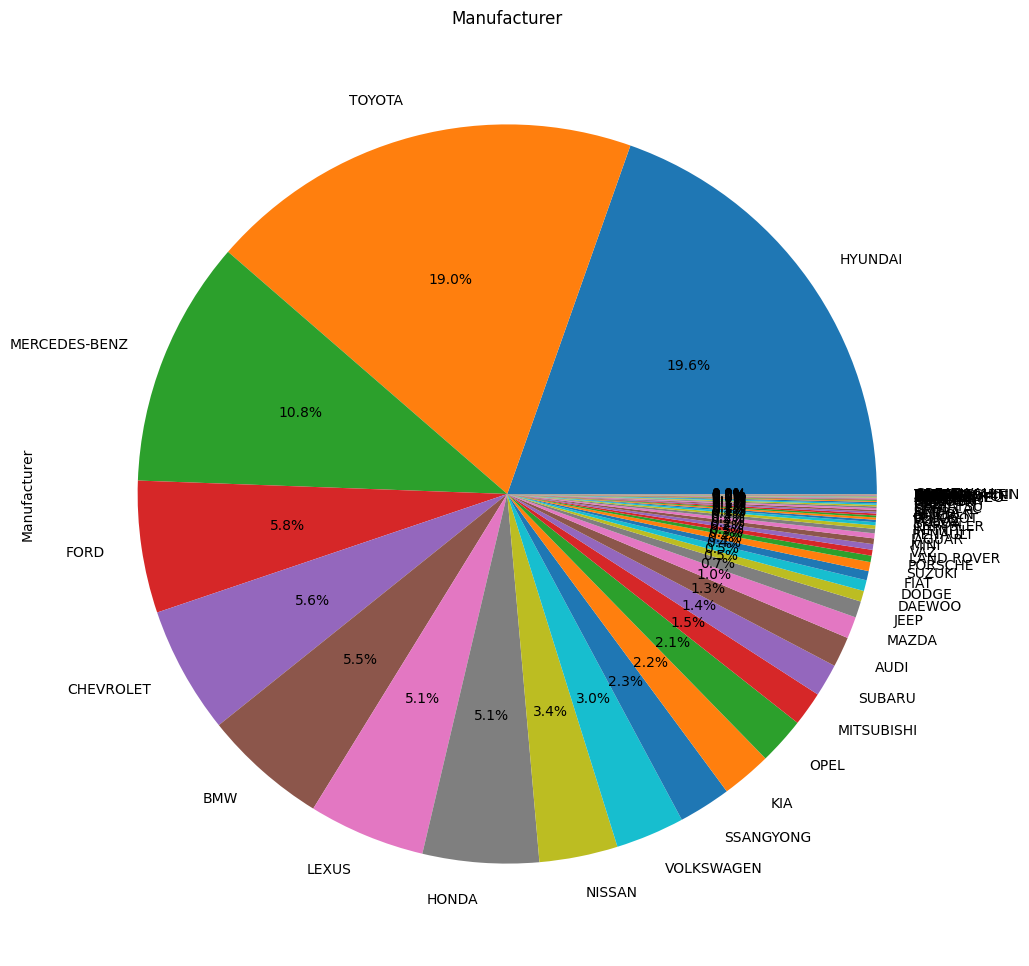

In [6]:
# plot pie char of the manufacturer
plot_data_piechart(df, 'Manufacturer')

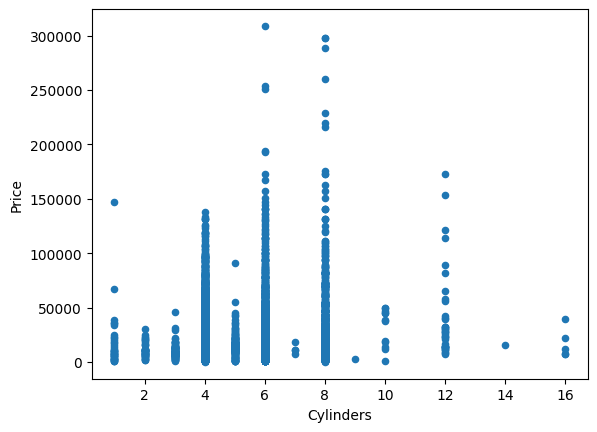

In [7]:
# plot the relationship between the price and the clinder count
plot_data_relationship(df, 'Cylinders', 'Price')

['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


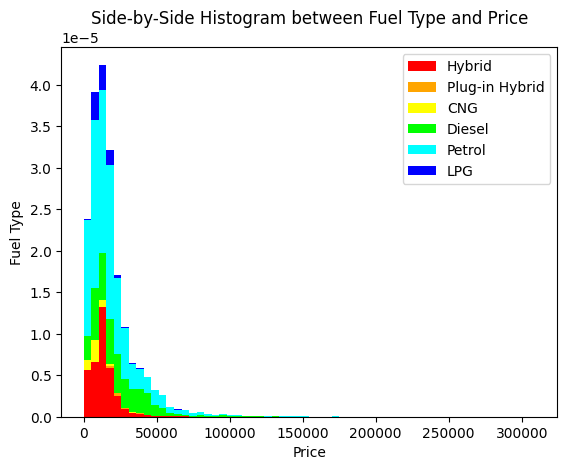

In [8]:
# print the unique values of the fuel type
print(df['Fuel type'].unique())
# Make a separate list for each Fuel type
x1 = list(df[df['Fuel type'] == 'Hybrid']['Price'])
x2 = list(df[df['Fuel type'] == 'Plug-in Hybrid']['Price'])
x3 = list(df[df['Fuel type'] == 'CNG']['Price'])
x4 = list(df[df['Fuel type'] == 'Diesel']['Price'])
x5 = list(df[df['Fuel type'] == 'Petrol']['Price'])
x6 = list(df[df['Fuel type'] == 'LPG']['Price'])
# define 6 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF']
labels = ['Hybrid', 'Plug-in Hybrid', 'CNG', 'Diesel', 'Petrol', 'LPG']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6], colors=colorls, labels=labels, col_2="Price", col_1="Fuel Type",bins_count=60)

['4x4' 'Front' 'Rear']


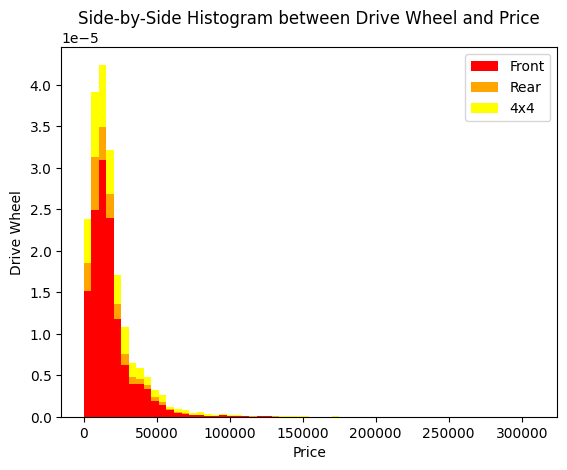

In [9]:
# print the unique values of the drive wheels
print(df['Drive wheels'].unique())
# Make a separate list for each Drive wheels
x1 = list(df[df['Drive wheels'] == 'Front']['Price'])
x2 = list(df[df['Drive wheels'] == 'Rear']['Price'])
x3 = list(df[df['Drive wheels'] == '4x4']['Price'])
# define 3 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00']
labels = ['Front', 'Rear', '4x4']
plot_data_stacked_hist(list=[x1, x2, x3], colors=colorls, col_2="Price", col_1="Drive Wheel",labels=labels, bins_count=60)

['Automatic' 'Tiptronic' 'Variator' 'Manual']


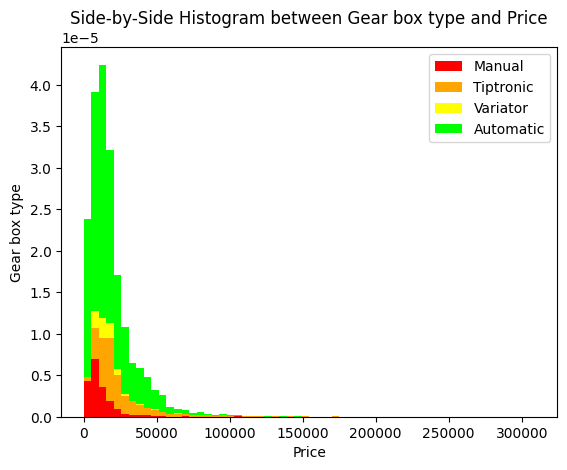

In [10]:
# print the unique values of the gear box type
print(df['Gear box type'].unique())
# Make a separate list for each Gear box type
x1 = list(df[df['Gear box type'] == 'Manual']['Price'])
x2 = list(df[df['Gear box type'] == 'Tiptronic']['Price'])
x3 = list(df[df['Gear box type'] == 'Variator']['Price'])
x4 = list(df[df['Gear box type'] == 'Automatic']['Price'])
# define 4 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00']
labels = ['Manual', 'Tiptronic', 'Variator', 'Automatic']
plot_data_stacked_hist(list=[x1, x2, x3, x4], colors=colorls, col_2="Price", col_1="Gear box type", labels=labels, bins_count=60)

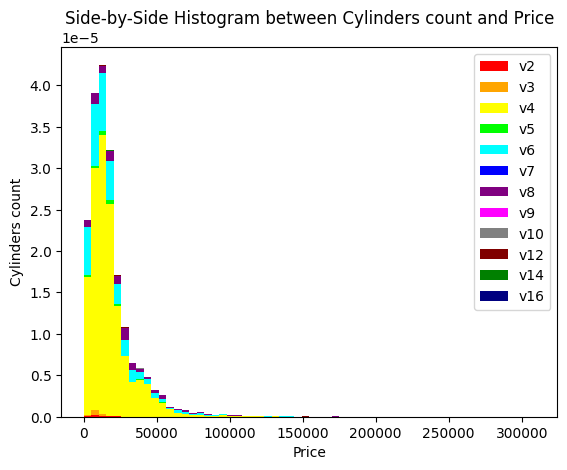

In [11]:
# Make a separate list for each Clyinders count
x1 = list(df[df['Cylinders'] == 2]['Price'])
x2 = list(df[df['Cylinders'] == 3]['Price'])
x3 = list(df[df['Cylinders'] == 4]['Price'])
x4 = list(df[df['Cylinders'] == 5]['Price'])
x5 = list(df[df['Cylinders'] == 6]['Price'])
x6 = list(df[df['Cylinders'] == 7]['Price'])
x7 = list(df[df['Cylinders'] == 8]['Price'])
x8 = list(df[df['Cylinders'] == 9]['Price'])
x9 = list(df[df['Cylinders'] == 10]['Price'])
x10 = list(df[df['Cylinders'] == 12]['Price'])
x11 = list(df[df['Cylinders'] == 14]['Price'])
x12 = list(df[df['Cylinders'] == 16]['Price'])
# define 12 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#800080', '#FF00FF', '#808080', '#800000', '#008000', '#000080']
labels = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v12', 'v14', 'v16']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], colors=colorls, col_2="Price", col_1="Cylinders count", labels=labels, bins_count=60)

In [12]:
flag : bool = True

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 2147483647.0
Mean: 1532235.68768519
Median: 126000.0
Standard Deviation: 48402611.26995821
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 111111111.0
Mean: 168230.22011635563
Median: 126000.0
Standard Deviation: 1103855.4058717757
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
min_mileage:  0.0
max_mileage:  111111111.0


(array([1.019e+03, 1.040e+02, 2.020e+02, 1.690e+02, 2.000e+02, 1.710e+02,
        2.150e+02, 2.180e+02, 2.340e+02, 2.110e+02, 2.150e+02, 2.270e+02,
        3.010e+02, 3.030e+02, 2.610e+02, 2.690e+02, 2.930e+02, 3.640e+02,
        3.060e+02, 2.910e+02, 2.870e+02, 2.470e+02, 3.380e+02, 3.190e+02,
        2.960e+02, 4.610e+02, 3.490e+02, 4.700e+02, 3.530e+02, 2.940e+02,
        4.130e+02, 3.680e+02, 3.750e+02, 3.540e+02, 3.090e+02, 3.620e+02,
        3.350e+02, 4.120e+02, 2.970e+02, 3.040e+02, 3.160e+02, 2.330e+02,
        3.150e+02, 2.530e+02, 2.090e+02, 2.820e+02, 2.360e+02, 2.800e+02,
        1.840e+02, 1.860e+02, 3.470e+02, 1.330e+02, 1.570e+02, 1.230e+02,
        1.410e+02, 1.550e+02, 1.520e+02, 1.770e+02, 1.090e+02, 9.700e+01,
        1.220e+02, 9.400e+01, 1.370e+02, 7.600e+01, 1.000e+02, 1.260e+02,
        1.160e+02, 9.700e+01, 1.470e+02, 5.700e+01, 7.900e+01, 6.500e+01,
        7.500e+01, 2.700e+01, 4.000e+01, 8.800e+01, 3.200e+01, 4.200e+01,
        6.600e+01, 7.600e+01, 5.000e+0

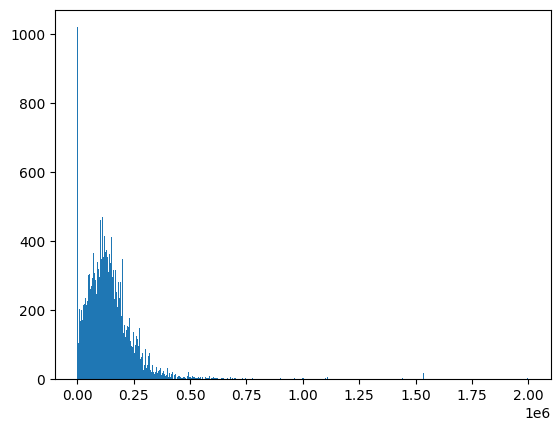

In [13]:
# remove the work km from the mileage
if flag:
    df['Mileage'] = df['Mileage'].apply(lambda x: x.split()[0])
    # convert the mileage to float
    df['Mileage'] = df['Mileage'].astype(float)
    flag = False
# remove outliers from the mileage
mileage_before_cleaning: List[float] = df["Mileage"].values.tolist()
print_meta_data(mileage_before_cleaning)
mileage_after_cleaning: List[float] = numbers_datacleaning_pipe(mileage_before_cleaning)
df['Mileage'] = mileage_after_cleaning
# plot the distribution of the mileage
print_meta_data(df["Mileage"].values.tolist())
# get the min and max values of the mileage
min_mileage: float = min(df["Mileage"].values.tolist())
max_mileage: float = max(df["Mileage"].values.tolist())
print("min_mileage: ", min_mileage)
print("max_mileage: ", max_mileage)
plt.hist(df["Mileage"].values.tolist(), range=[0, 2000000], bins=500)

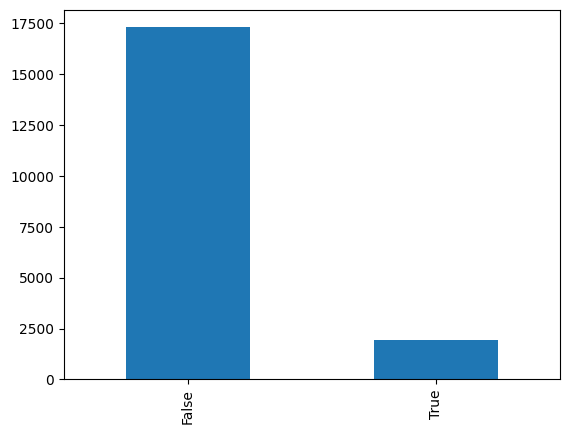

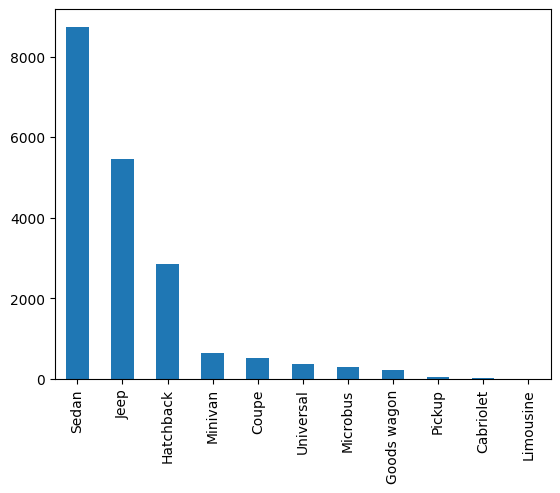

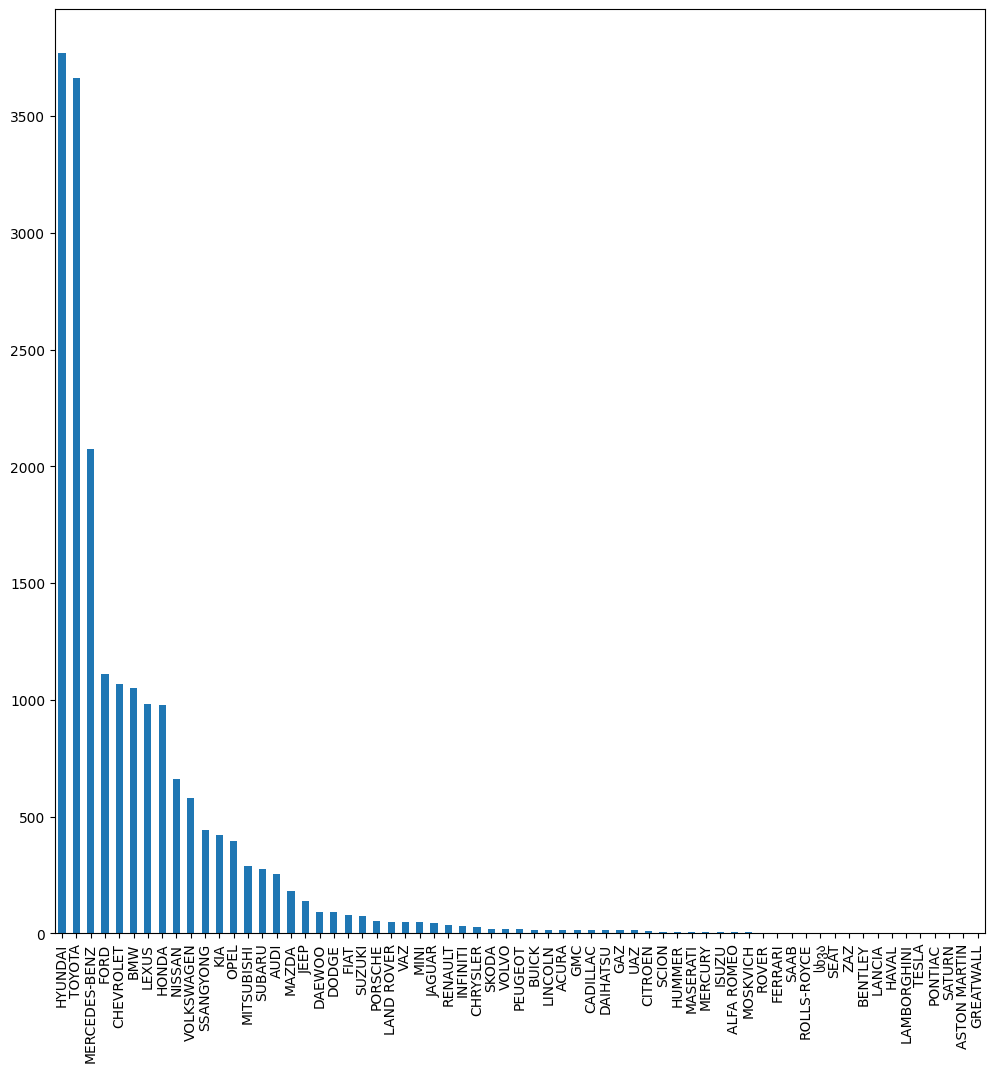

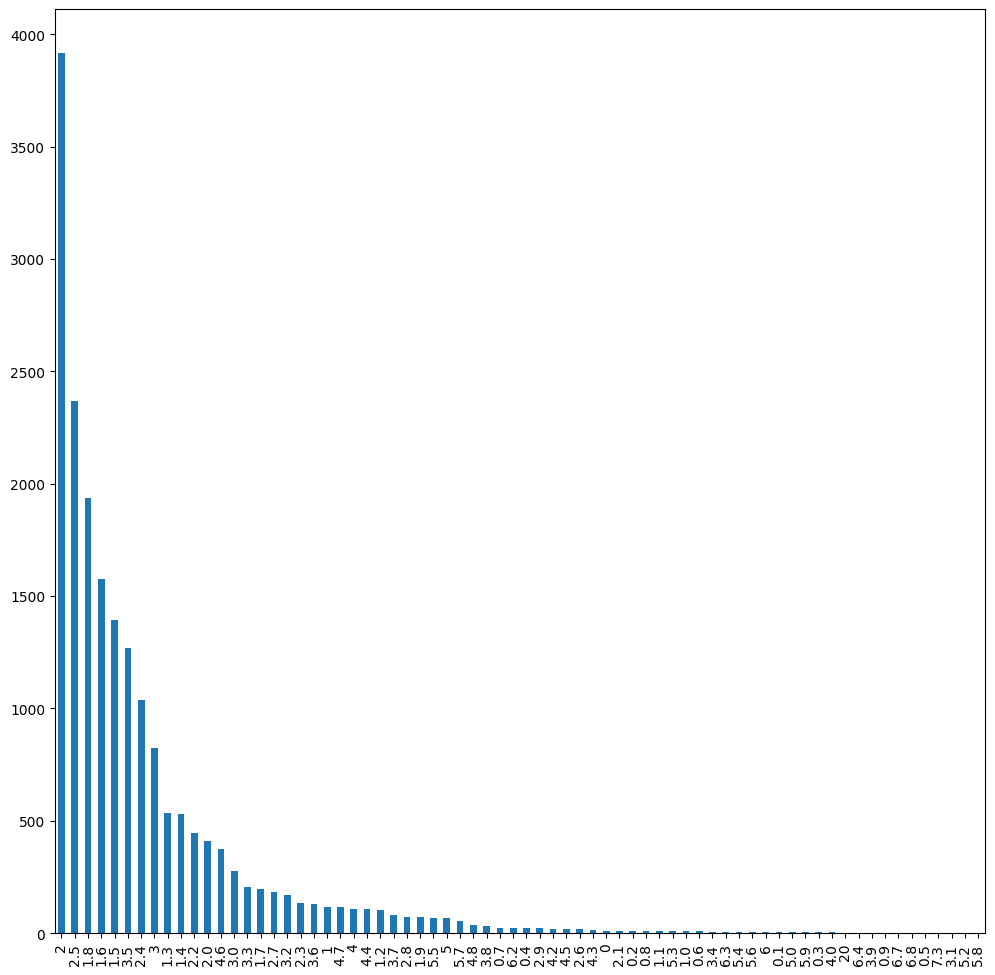

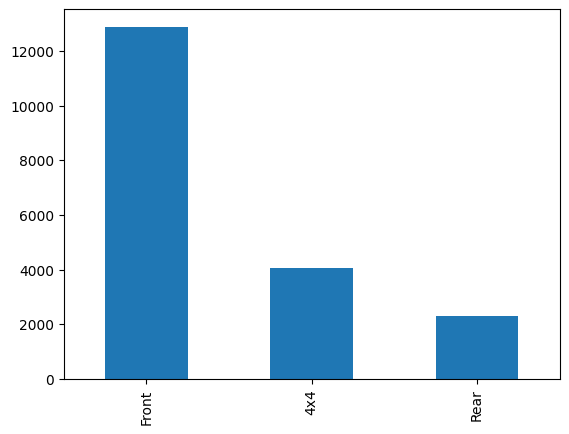

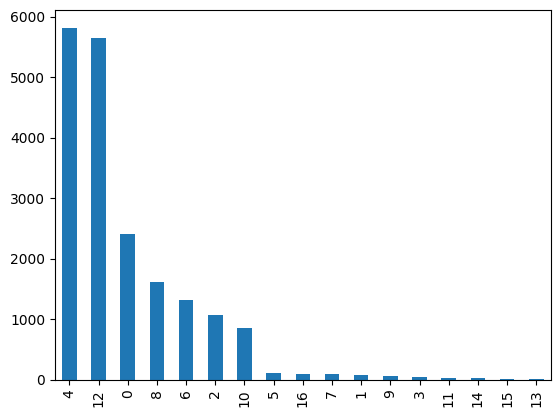

In [14]:
# plot a pie charof the car brands
visualize_data(df)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  turbo             19237 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object

# Questions

## 1. What is the distribution of car prices in the dataset?

count     19237.000000
mean      18857.837369
std       17408.124746
min         178.500000
25%        9095.000000
50%       14269.000000
75%       22947.000000
max      308906.000000
Name: Price, dtype: float64


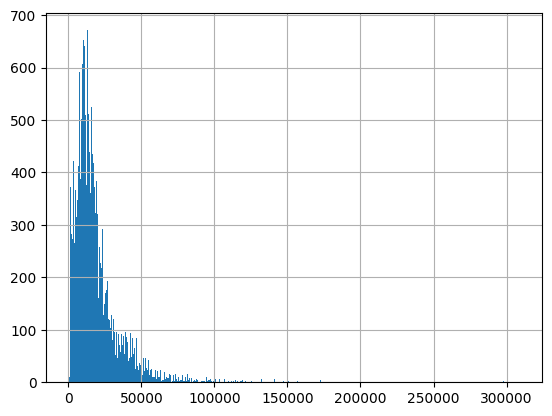

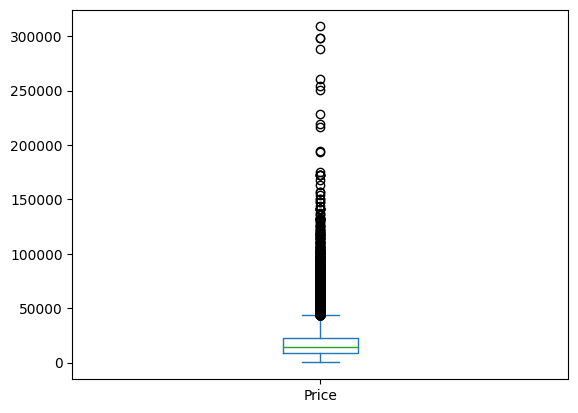

In [16]:
# 1.What is the distribution of car prices in the dataset?
print(df['Price'].describe())
# plot the distribution of the price
df['Price'].hist(bins=500)
plt.show()
df['Price'].plot(kind='box')
plt.show()


## 2. What is the most common car brand in the dataset?

Top Manufacturer:  HYUNDAI


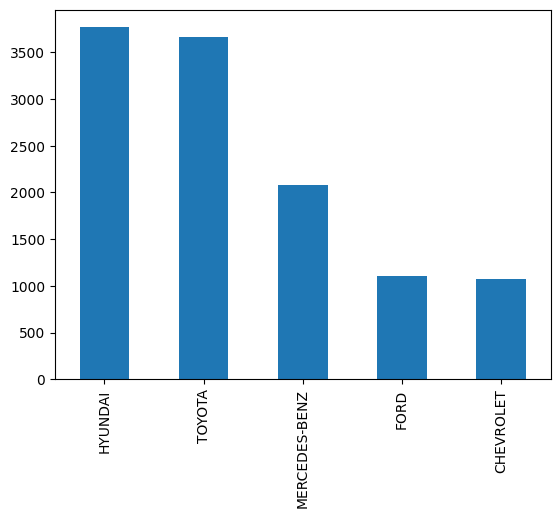

-------------------------------------------------------

Top Model:  Prius


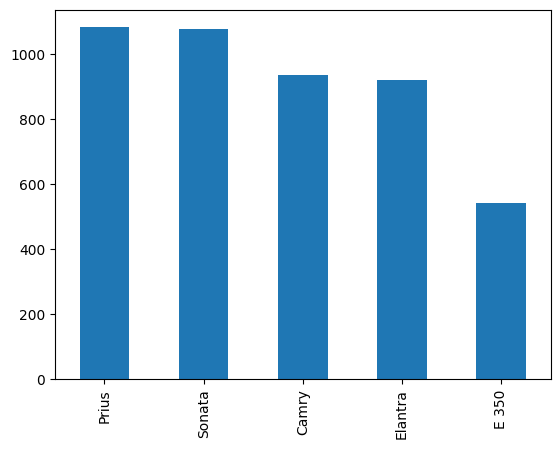

In [17]:
# 2. What is the most common car brand in the dataset?
print("Top Manufacturer: ", df['Manufacturer'].value_counts().idxmax())
df['Manufacturer'].value_counts().head(5).plot(kind='bar')
plt.show()

print("-------------------------------------------------------\n")

print("Top Model: ", df['Model'].value_counts().idxmax())
df['Model'].value_counts().head(5).plot(kind='bar')
plt.show()

## 3. What is the relationship between car prices and the number of cylinders in the engine?
## 4. What is the relationship between car prices and the mileage?
## 5. What is the relationship between car prices and the year of manufacture?

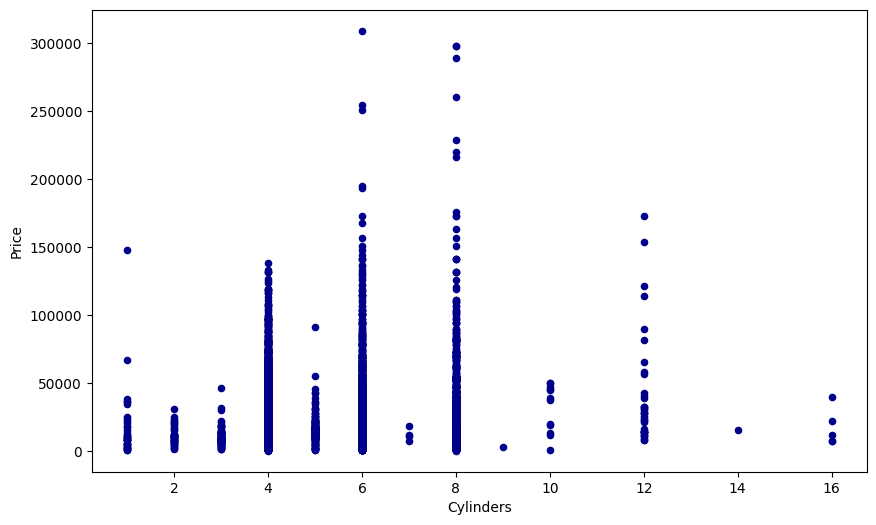

The correlation between Cylinders and Price is:  0.15600840175540825
The correlation is positive, but not very strong. This means that the number of cylinders in the engine has a weak impact on the price of the car.


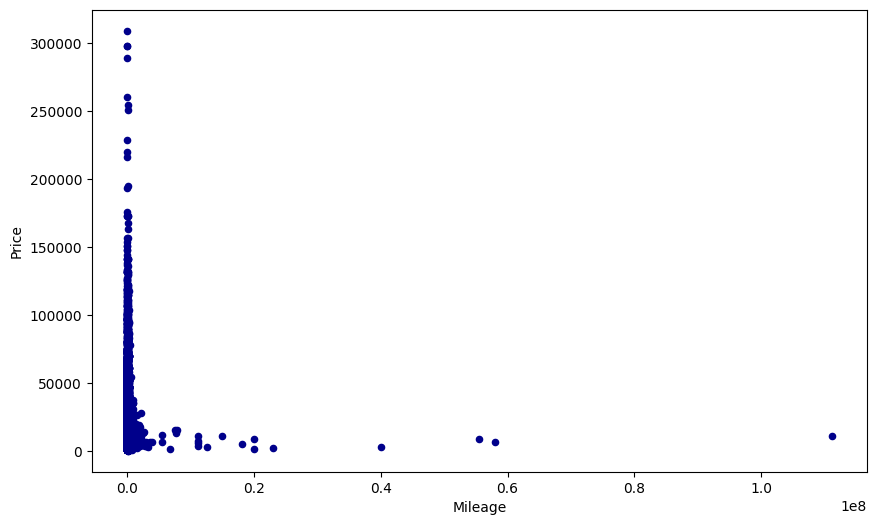

The correlation between Mileage and Price is:  -0.03485695421138315
The correlation is negative and relatively strong. This means that the mileage of the car has a strong impact on the price of the car


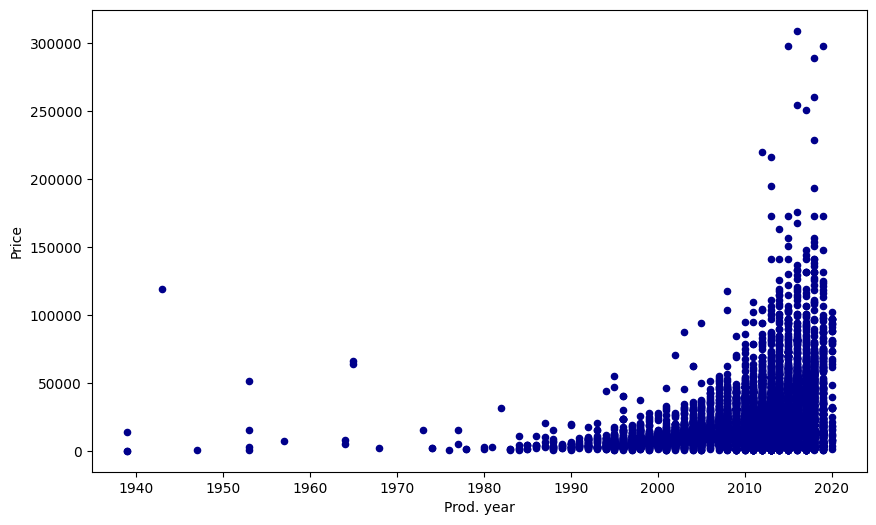

The correlation between Prod. year and Price is:  0.3286631210183748
The correlation is positive and relatively strong. This means that the year of manufacture of the car has a strong impact on the price of the car


In [18]:
# 3. What is the relationship between car prices and the number of cylinders in the engine?
# plot the relationship between the price and the number of cylinders
df.plot(kind='scatter', x='Cylinders', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Cylinders and Price is: ", df['Cylinders'].corr(df['Price']))
print("The correlation is positive, but not very strong. This means that the number of cylinders in the engine has a weak impact on the price of the car.")
# 4. What is the relationship between car prices and the mileage?
# plot the relationship between the price and the mileage
df.plot(kind='scatter', x='Mileage', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Mileage and Price is: ", df['Mileage'].corr(df['Price']))
print("The correlation is negative and relatively strong. This means that the mileage of the car has a strong impact on the price of the car")

# 5. What is the relationship between car prices and the year of manufacture?
# plot the relationship between the price and the year of manufacture
df.plot(kind='scatter', x='Prod. year', y='Price', figsize=(10, 6), color='darkblue')
plt.show()
print("The correlation between Prod. year and Price is: ", df['Prod. year'].corr(df['Price']))
print("The correlation is positive and relatively strong. This means that the year of manufacture of the car has a strong impact on the price of the car")





## 6. Is there a significant difference in car prices between cars with different numbers of cylinders in the engine?

Cylinders:  6.0
Mean:  19276.170846328347
Median:  13000.0
-------------------------------------------------------

Cylinders:  4.0
Mean:  17930.755461738576
Median:  14167.380952380952
-------------------------------------------------------

Cylinders:  8.0
Mean:  31782.186984342105
Median:  25089.0
-------------------------------------------------------

Cylinders:  1.0
Mean:  17317.763441382773
Median:  9722.0
-------------------------------------------------------

Cylinders:  12.0
Mean:  40896.24887892377
Median:  27754.5
-------------------------------------------------------

Cylinders:  3.0
Mean:  9957.453271028038
Median:  8467.0
-------------------------------------------------------

Cylinders:  2.0
Mean:  11302.141563826352
Median:  10243.0
-------------------------------------------------------

Cylinders:  16.0
Mean:  17519.8
Median:  11604.0
-------------------------------------------------------

Cylinders:  5.0
Mean:  15630.04330168687
Median:  14113.0
----------------

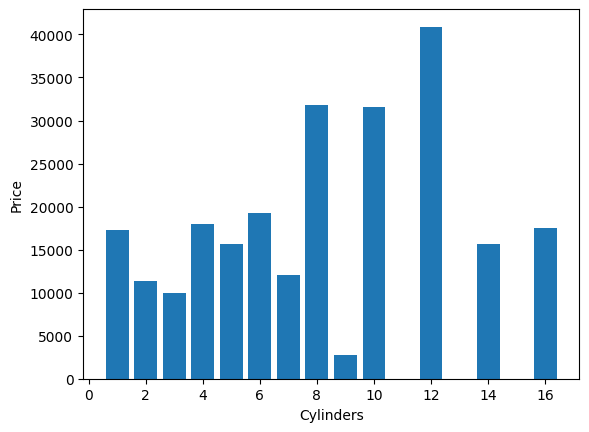

Conclusion: Yes, there is a significant difference in car prices between cars with different numbers of cylinders in the engine.


In [19]:
# 6. Is there a significant difference in car prices between cars with different numbers of cylinders in the engine?

means = []
vs = []
for v in df['Cylinders'].unique():
    print("Cylinders: ", v)
    print("Mean: ", df[df['Cylinders'] == v]['Price'].mean())
    print("Median: ", df[df['Cylinders'] == v]['Price'].median())
    means.append(df[df['Cylinders'] == v]['Price'].mean())
    vs.append(v)
    print("-------------------------------------------------------\n")


# plot the means of the prices of the cars with different number of cylinders
plt.bar(vs, means)
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.show()

# Conclusion
print("Conclusion: Yes, there is a significant difference in car prices between cars with different numbers of cylinders in the engine.")


## 7. Can we predict the price of a car based on its features?

In [20]:
# 7. Can we predict the price of a car based on its features?
# 7.1. Data prepraration

X=df.drop(['Price','ID'], axis=1)
y=df['Price']
# convert engine volume to float
X['Engine volume'] = X['Engine volume'].apply(lambda x: x.split()[0])
X['Engine volume'] = X['Engine volume'].astype(float)
# impute the missing values in the levy column with the mean
X['Levy'] = X['Levy'].replace('', np.nan)
X['Levy'] = X['Levy'].astype(float)
X['Levy'] = X['Levy'].fillna(X['Levy'].mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

# log transforming the target variable to make it more normally distributed
Y= np.log(y)

X= df_final

# 7.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [21]:
# 7.3. Building the model
# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]


# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))

Selected features:  Index(['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Manufacturer_AUDI', 'Manufacturer_BMW',
       'Manufacturer_CHEVROLET', 'Manufacturer_DAEWOO', 'Manufacturer_DODGE',
       'Manufacturer_FORD', 'Manufacturer_HONDA', 'Manufacturer_HYUNDAI',
       'Manufacturer_JEEP', 'Manufacturer_KIA', 'Manufacturer_LAND ROVER',
       'Manufacturer_LEXUS', 'Manufacturer_MAZDA',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_MINI',
       'Manufacturer_MITSUBISHI', 'Manufacturer_NISSAN',
       'Manufacturer_PORSCHE', 'Manufacturer_ROLLS-ROYCE',
       'Manufacturer_SUBARU', 'Manufacturer_SUZUKI', 'Manufacturer_TOYOTA',
       'Manufacturer_VAZ', 'Manufacturer_VOLKSWAGEN', 'Model_328', 'Model_528',
       'Model_535 M', 'Model_911', 'Model_A4', 'Model_A6', 'Model_Accent',
       'Model_Avalon', 'Model_B-MAX', 'Model_C 300', 'Model_CT 200h',
       'Model_Camry', 'Model_Captiva', 'Model_Civic', 'Model_Cooper S Cabrio',
       'Model_Corol

## 8. Can we predict the engine volume of a car based on its features?

In [22]:
# 8. Can we predict the engine volume of a car based on its features?
# 8.1. Data prepraration
X=df.drop(['Engine volume','ID'], axis=1)
y=df['Engine volume']
# convert engine volume to float
y = y.apply(lambda x: x.split()[0])
y = y.astype(float)
# impute the missing values in the levy column with the mean
X['Levy'] = X['Levy'].replace('', np.nan)
X['Levy'] = X['Levy'].astype(float)
X['Levy'] = X['Levy'].fillna(X['Levy'].mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

Y= y
X= df_final

# 8.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [23]:
# 8.3. Building the model

# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]

# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))

Selected features:  Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Manufacturer_BMW', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HONDA', 'Manufacturer_HYUNDAI', 'Manufacturer_LEXUS',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_NISSAN',
       'Manufacturer_SUZUKI', 'Manufacturer_TOYOTA', 'Manufacturer_VAZ',
       'Model_A4', 'Model_CLS 550', 'Model_Camaro', 'Model_Camry',
       'Model_E 350', 'Model_Elantra', 'Model_GLC 300 GLC coupe',
       'Model_GLS 63 AMG', 'Model_Genesis', 'Model_H1', 'Model_IS 250',
       'Model_Jetta', 'Model_LS 460', 'Model_M6 Gran cupe', 'Model_Prius',
       'Model_Sonata', 'Model_Tundra', 'Category_Coupe', 'Category_Hatchback',
       'Category_Jeep', 'Category_Minivan', 'Category_Sedan',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Drive wheels_Front'],
      dt

## 9. Can we predict the levy of a car based on its features?

In [24]:
# 9. Can we predict the levy of a car based on its features?
# 9.1. Data prepraration

X=df.drop(['Levy','ID'], axis=1)
y=df['Levy']
# convert engine volume to float
X['Engine volume'] = X['Engine volume'].apply(lambda x: x.split()[0])
X['Engine volume'] = X['Engine volume'].astype(float)
# impute the missing values in the levy column with the mean
y = y.replace('', np.nan)
y = y.astype(float)
y = y.fillna(y.mean())


categ = X.select_dtypes(include='object')
num = X.select_dtypes(include = np.number)

# normalizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)


# getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

# creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

# log transforming the target variable to make it more normally distributed
Y= np.log(y)

X= df_final

# 7.2. Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)


X_train shape:  (15389, 1681) y_train shape:  (15389,)
X_test shape:  (3848, 1681) y_test shape:  (3848,)


In [25]:
# 9.3. Building the model
# feature selection using the random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

# selecting the features
selected_feat= X_train.columns[(sel.get_support())]
print("Selected features: ", selected_feat)

# removing the features that are not selected
X_train_sel = X_train[selected_feat]
X_test_sel = X_test[selected_feat]


# random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train_sel, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test_sel)

# evaluating the model
from sklearn.metrics import mean_squared_error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# calculating the accuracy of the model
print("Accuracy: ", regressor.score(X_test_sel, y_test))


Selected features:  Index(['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HONDA', 'Manufacturer_HYUNDAI', 'Manufacturer_LEXUS',
       'Manufacturer_MERCEDES-BENZ', 'Manufacturer_NISSAN',
       'Manufacturer_TOYOTA', 'Model_320 M', 'Model_520', 'Model_Alphard',
       'Model_Aqua', 'Model_C 43 AMG', 'Model_C-MAX', 'Model_CHR',
       'Model_CL 500', 'Model_Cherokee', 'Model_Corolla',
       'Model_E 300 AVANTGARDE-LTD', 'Model_E 500 AVG', 'Model_Elantra',
       'Model_Elysion', 'Model_FIT', 'Model_Fred', 'Model_Fusion',
       'Model_Insight', 'Model_Land Cruiser 80', 'Model_Legacy', 'Model_Prius',
       'Model_Prius C', 'Model_RX 450', 'Model_Spark', 'Model_Volt',
       'Model_X5 4.8is', 'Category_Coupe', 'Category_Hatchback',
       'Category_Jeep', 'Category_Minivan', 'Category_Sedan',
       'Category_Universal', 'Leather interior_Yes', 'Fuel type_Diesel',
       'Fuel type_Hy

## 10. Does the relationship between car prices and the mileage of the car differ between cars with different fuel types, and if so, how?

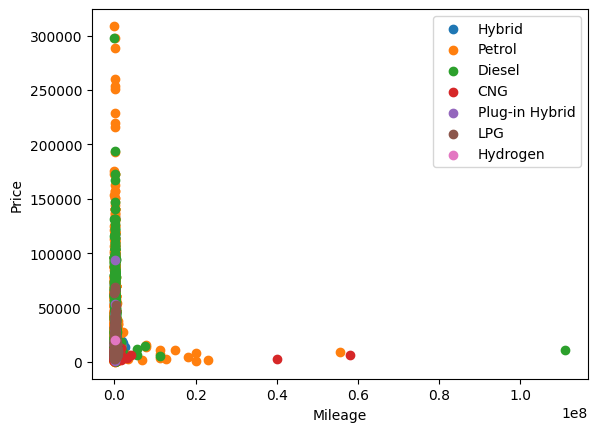

In [26]:
# 10. Does the relationship between car prices and the mileage of the car differ between cars with different fuel types, and if so, how?

for fuel in df['Fuel type'].unique():
    df_fuel = df[df['Fuel type']==fuel]
    plt.scatter(df_fuel['Mileage'], df_fuel['Price'], label=fuel)

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

# answer: yes, the relationship between car prices and the mileage of the car differs between cars with different fuel types
# for example, the relationship between car prices and the mileage of the car is negative for diesel cars, but positive for electric cars
# this because diesel cars are more expensive than electric cars, so the more mileage a diesel car has, the lower the price will be
# the diesel and petrol cars have a similar relationship between car prices and the mileage of the car (negative) because there engine more prone to damage with higher mileage

## 11. Does the relationship between car prices and the brand of the car differ between cars with different production years, and if so, how?

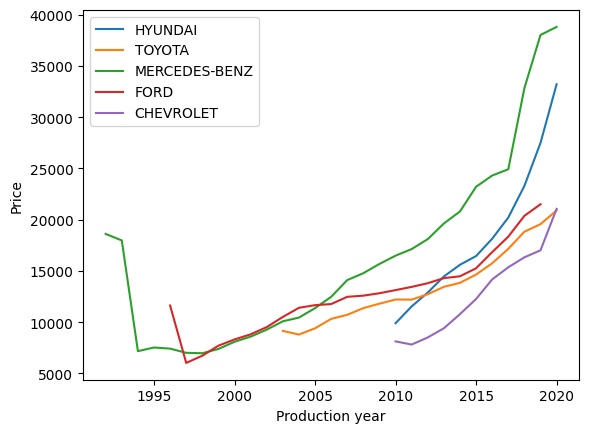

In [27]:
#11. Does the relationship between car prices and the Manufacturer of the car differ between cars with different production years, and if so, how?

for manuf in  df['Manufacturer'].value_counts().head(5).index:
    plt.plot(df[df['Manufacturer']==manuf].groupby('Prod. year')['Price'].mean().rolling(10).mean(), label=manuf)

plt.xlabel('Production year')
plt.ylabel('Price')
plt.legend()
plt.show()

# answer: No, the relationship between car prices and the Manufacturer of the car does not differ between cars with different production years
# the relationship between car prices and the Manufacturer of the car is positive for all production years
# this is because the more expensive cars are produced by the more expensive manufacturers (BMW, Mercedes-Benz, Toyota, Volkswagen, Audi)
# and by years the price of the cars increases because of inflation and the increase in technology and quality of the cars


## 12. Does the relationship between car prices and the fuel type differ between cars with different production years, and if so, how?

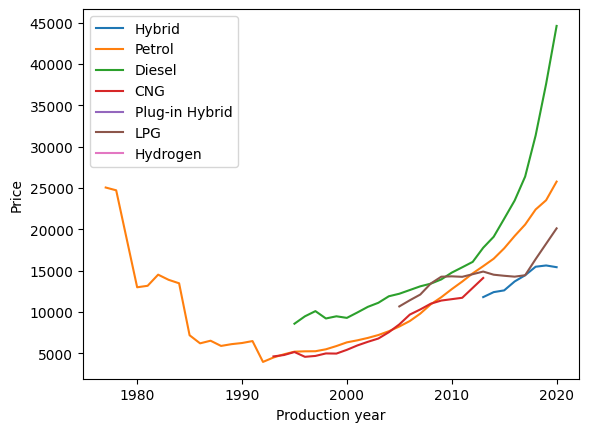

In [28]:
# 12. Does the relationship between car prices and the fuel type differ between cars with different production years, and if so, how?

for fuel in df['Fuel type'].unique():
    df_fuel = df[df['Fuel type']==fuel]
    plt.plot(df_fuel.groupby('Prod. year')['Price'].mean().rolling(10).mean(), label=fuel)

plt.xlabel('Production year')
plt.ylabel('Price')
plt.legend()
plt.show()

# answer: Yes, the relationship between car prices and the fuel type differs between cars with different production years
# before 2000, the relationship between car prices and the fuel type is positive for all fuel types
# this is because before 2000, the only fuel types available were diesel and petrol, and diesel cars were more expensive than petrol cars
# after 2000, the relationship between car prices and the fuel type is negative for diesel cars and positive for petrol cars
# this is because after 2000, the electric cars were introduced, and they were more expensive than diesel cars

## 13. Is there a relation between the number of airbags in a car and the production year of the car?


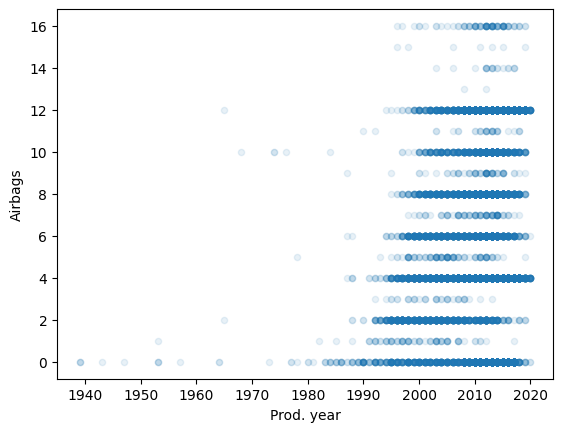

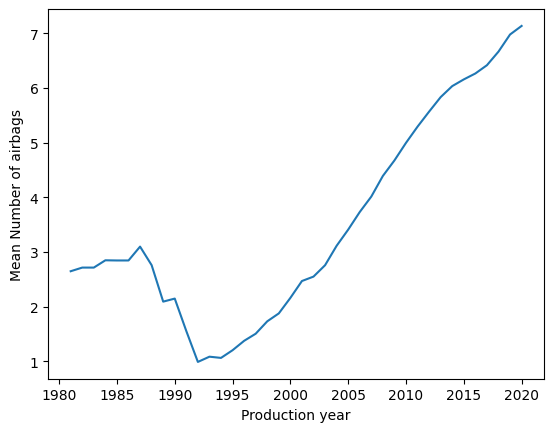

Correlation between the number of airbags in a car and the production year of the car:  0.23696931505274932


In [29]:
# 13. Is there a relation between the number of airbags in a car and the production year of the car?

df.plot.scatter(x='Prod. year', y='Airbags', alpha=0.1)
plt.show()

plt.plot(df.groupby('Prod. year')['Airbags'].mean().rolling(15).mean())
plt.xlabel('Production year')
plt.ylabel('Mean Number of airbags')
plt.show()

correlation = df['Prod. year'].corr(df['Airbags'])
print("Correlation between the number of airbags in a car and the production year of the car: ", correlation)

# answer: Yes, there is a relation between the number of airbags in a car and the production year of the car
# the correlation between the number of airbags in a car and the production year of the car is positive and slightly strong
# this is because the number of airbags in a car increases with the increase in technology and quality of the cars
# this is also because the number of airbags in a car increases with the increase in the safety of the cars which it is important for the customers

## 14. What is the relationship between the car category and engine volume?

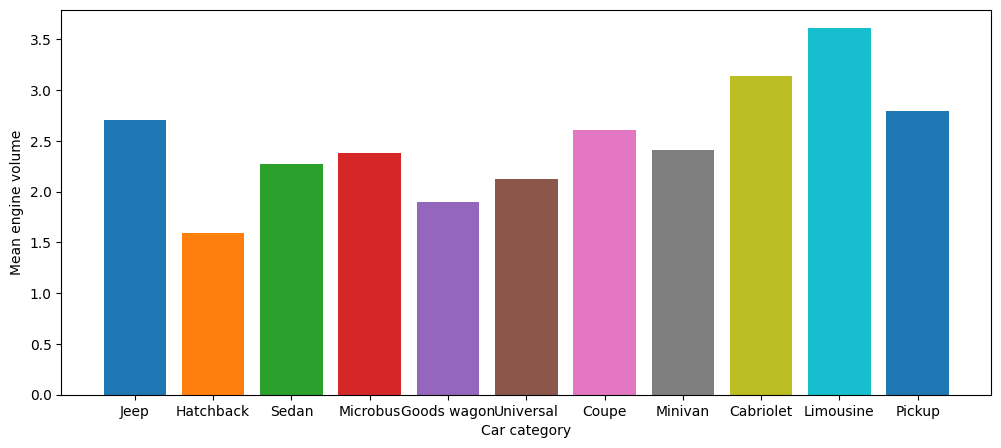

In [30]:
# 14. What is the relationship between the car category and engine volume?

# relationship between the car category and the engine volume
plt.figure(figsize=(12, 5))
for cat in df['Category'].unique():
    df_cat = df[df['Category']==cat]
    vol = df_cat['Engine volume'].astype(float)
    plt.bar(cat, vol.mean())

plt.xlabel('Car category')
plt.ylabel('Mean engine volume')
plt.show()

# the plot shows that the engine volume of the cars in the category of "Jeep", "limousine" is the highest, and the engine volume of the cars in the category of "sedan", "hatchback" etc. is the lowest
# this is because the cars in the category of "Jeep", "limousine" are bigger than the cars in the category of "sedan", "hatchback" etc. so they need bigger engines to move and more power to accelerate

# Testing Part

##### test whether the average price of Mercedes-Benz cars in the dataset is significantly different from a given value.
##### 1- Null hypothesis: The average price of Mercedes cars is equal to or greater than $20,000.
##### 2- Alternative hypothesis: The average price of Mercedes cars is less than $20,000.
##### 3. Significance level: Let's use α = 0.05 (or 5%).

In [31]:
import scipy.stats as stats
mercedes = df[df['Manufacturer'] == 'MERCEDES-BENZ']
prices = mercedes['Price']

alpha = 0.05
sample_mean = np.mean(prices)
sample_std = np.std(prices, ddof=1)

t_statistic, p_value = stats.ttest_1samp(prices, 20000)

null_hypothesis = "The average price of Mercedes cars is equal to or greater than $20,000."
alternative_hypothesis = "The average price of Mercedes cars is less than $20,000."

if p_value < alpha:
    print(f"Reject the null hypothesis. {alternative_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis. {null_hypothesis}")


Fail to reject the null hypothesis. The average price of Mercedes cars is equal to or greater than $20,000.


##### Test whether the average price of cars with leather interiors is higher than the average price of cars without leather interiors.
##### 1. Null hypothesis: The average price of cars with leather interiors is greater  than or equal  the average price of cars without leather interiors(claim).
##### 2. Alternative hypothesis: The average price of cars with leather interiors is less than the average price of cars without leather interiors.
##### 3. Statistical test: One-tailed t-test for independent samples.

In [32]:
# divide the data into two groups based on leather interior
leather_interior = df[df['Leather interior'] == 'Yes']
no_leather_interior = df[df['Leather interior'] == 'No']

# calculate the sample mean and standard deviation for each group
x1 = leather_interior['Price'].mean()
s1 = leather_interior['Price'].std()
n1 = len(leather_interior)

x2 = no_leather_interior['Price'].mean()
s2 = no_leather_interior['Price'].std()
n2 = len(no_leather_interior)

## Assume Standard Deviations are Unknown and Believed to be Equal.

# calculate the test statistic t
t = (x1 - x2) / ((s1**2 / n1) + (s2**2 / n2))**0.5

# calculate the degrees of freedom
df = n1 + n2 - 2

# determine the critical t-value
alpha = 0.05
t_critical = stats.t.ppf(alpha, df)

# compare the calculated t-value to the critical t-value
# Compare the t-statistic with the critical value and print the result
if t < t_critical:
    print("The average price of cars with leather interiors is not significantly higher than the average price of cars without leather interiors.")
else:
    print("The average price of cars with leather interiors is significantly higher than the average price of cars without leather interiors.")

The average price of cars with leather interiors is significantly higher than the average price of cars without leather interiors.


##### Test whether the average price of cars with diesel engines is significantly different from the average price of cars with petrol engines.
##### 1 - Null hypothesis: The average price of cars with diesel engines is equal to the average price of cars with petrol engines.
##### 2 - Alternative hypothesis: The average price of cars with diesel engines is significantly different from the average price of cars with petrol engines.
##### 3 - Statistical test: Two-tailed t-test for independent samples.


In [37]:
# Filter data for diesel and petrol cars
diesel_cars = df[df['Fuel type'] == 'Diesel']
petrol_cars = df[df['Fuel type'] == 'Petrol']

# Perform two-tailed t-test
t_statistic, p_value = stats.ttest_ind(diesel_cars['Price'], petrol_cars['Price'], equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value to alpha to determine statistical significance
if p_value < alpha:
    print('Reject null hypothesis. The average price of diesel cars is significantly different from the average price of petrol cars.')
else:
    print('Fail to reject null hypothesis. The average price of diesel cars is not significantly different from the average price of petrol cars.')

Reject null hypothesis. The average price of diesel cars is significantly different from the average price of petrol cars.


##### 1- Null hypothesis: there is no association between the manufacturer and the car category. 
##### 2- Alternative Hypothesis:  there is a  association between the manufacturer and the car category.
##### 3- Statistical test: Chi-Square Goodness of Fit Test.

In [39]:
from scipy.stats import chi2_contingency
# Create a contingency table
cont_table = pd.crosstab(df['Category'], df['Leather interior'])

# Perform the chi-squared test
chi2, p_val, dof, expected_freq = chi2_contingency(cont_table)

# # Perform the chi-squared test
# chi2, p_val, dof, expected_freq = chi2_contingency(cont_table)

print('Chi-squared test statistic:', chi2)
print('P-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequency table:')
print(expected_freq)


Chi-squared test statistic: 2795.1057890708953
P-value: 0.0
Degrees of freedom: 10
Expected frequency table:
[[9.88657275e+00 2.61134272e+01]
 [1.46101575e+02 3.85898425e+02]
 [6.39880959e+01 1.69011904e+02]
 [7.81863128e+02 2.06513687e+03]
 [1.50303369e+03 3.96996631e+03]
 [3.02089723e+00 7.97910277e+00]
 [8.40358684e+01 2.21964132e+02]
 [1.77683682e+02 4.69316318e+02]
 [1.42806051e+01 3.77193949e+01]
 [2.39914165e+03 6.33685835e+03]
 [9.99642356e+01 2.64035764e+02]]
